#### Нейройсеть
<img src="./xor_problem.png" />
1 скрытый слой с 2 нейронами

$w_{12}$ - вес 1 нейрона у 2 нейрона следующего слоя

$x_{1}$ - значение нейрона

$n_{1}$ - вход 1 нейрона в слое ($\sum_{i} w_{ji}x_{i} $)

Матрица весов первого слоя `weight_1`: $\begin{pmatrix} w_{11} & w_{12}\\ w_{21} & w_{22} \end{pmatrix}$

Базис второго слоя `bias_1`: $ \begin{pmatrix} b_{1} & b_{2}\end{pmatrix} $

Вычисление входа второго слоя: $ \begin{pmatrix} x_{1} & x_{2} \end{pmatrix} \begin{pmatrix} w_{11} & w_{12}\\ w_{21} & w_{22} \end{pmatrix} + \begin{pmatrix} b_{1} & b_{2}\end{pmatrix} = \begin{pmatrix} n_{1} & n_{2} \end{pmatrix} $

Значения второго слоя: $ \begin{pmatrix} f(n_{1}) & f(n_{2}) \end{pmatrix} = \begin{pmatrix} x_{12} & x_{22} \end{pmatrix} $

Матрица весов второго слоя `weight_2`: $\begin{pmatrix} w_{11} \\ w_{21} \end{pmatrix}$

Базис третьего слоя `bias_2`: $ \begin{pmatrix} b_{3}\end{pmatrix} $

Вычисление входа третьего слоя: $ \begin{pmatrix} x_{12} & x_{22} \end{pmatrix} \begin{pmatrix} w_{11} \\ w_{21} \end{pmatrix} + \begin{pmatrix} b_{3}\end{pmatrix} = \begin{pmatrix} n_{13}\end{pmatrix} $

Значение 3 слоя: $f(n_{13}) = x_{13}$

Ошибка сети: $ (y_{target} - x_{13}) * f'(n_{13}) = \delta_{13}$

ошибки 2 слоя: $ \delta_1^3 \circ \begin{pmatrix} w_{11} \\ w_{21} \end{pmatrix}^T \circ \begin{pmatrix} f'(n_{1}) &  f'(n_{2}) \end{pmatrix}) = \begin{pmatrix} \delta_1^2 & \delta_2^2 \end{pmatrix} $

Общая формула обратного распространения ошибки: $ \begin{pmatrix} \delta_1 & ... & \delta_n \end{pmatrix} W^T \circ \begin{pmatrix} f'(n_{1}) & ... & f'(n_{n}) \end{pmatrix} $

Изменение весов 2 слоя:  $ \ \begin{pmatrix} x_{12} & x_{22} \end{pmatrix}^T \begin{pmatrix} \delta_1^3 \end{pmatrix} = \begin{pmatrix} \Delta_{11} \\ \Delta_{12} \end{pmatrix} $

Извенения базиса 2 слоя: $ \delta_1^3  = \Delta_b $

Изменение весов 1 слоя:  $ \begin{pmatrix} x_{11} & x_{12} \end{pmatrix}^T \begin{pmatrix} \delta_1^2 & \delta_2^2 \end{pmatrix} =
\begin{pmatrix} x_{11} \\ x_{12} \end{pmatrix} \begin{pmatrix} \delta_1^2 & \delta_2^2 \end{pmatrix} = \begin{pmatrix} \Delta_{11} & \Delta_{12} \\ \Delta_{12} & \Delta_{22} \end{pmatrix}$

Извенения базисов 1 слоя: $ \begin{pmatrix} \delta_1^2 & \delta_2^2 \end{pmatrix}  = \begin{pmatrix} \Delta_{b1} & \Delta_{b2} \end{pmatrix} $

Итоговое значение весов первого слоя: $\begin{pmatrix} w_{11} & w_{12}\\ w_{21} & w_{22} \end{pmatrix} + \alpha * \begin{pmatrix} \Delta_{11} & \Delta_{12} \\ \Delta_{12} & \Delta_{22} \end{pmatrix} $, где $\alpha$ - скорость градиентного спуска

Легко заметить, что если повысить размерность входных данных до $\begin{pmatrix} x_{1} & x_{2} \\ x_{1} & x_{2} \\ .. \\ x_{1} & x_{2} \\ x_{1} & x_{2} \end{pmatrix}$, все формулы продолжат работать (кроме умножения $\circ $ - его просто придется примернить к каждой строчке).

Тогда при перемножении ошибки n-ного слоя со значениями нейронов слоя n-1 будут перемножены матрицы размера $ n\times l$ на $l\times m$, где l - это размерность входных данных. Получится матрица размера $n \times m$, которая и требовалась.

Проблемы будут только в градиенте базиса: он будет размера $l\times m$, и надо будет просуммировать строки (чтобы получить $1\times m$). Это можно сделать с помощью умножения на еденичный вектор длины l.

XOR PROBLEM

In [1]:
import os
import numpy as np
from random import randint
import matplotlib.pyplot as plt

In [2]:
# Функция, которую будем предсказывать:
def xor(x, y):
    return 0 if x+y != 1 else 1

# массив данных, на которых будем обучать нейросеть
inputs = []
expected_output = []
for _ in range(1000):
    x = randint(0, 1)
    y = randint(0, 1)
    inputs.append([x , y])
    expected_output.append([xor(x, y)])

inputs = np.array(inputs)
expected_output = np.array(expected_output)
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

# функция активации
def sigmoid(x):
    return 1.0/ (1 + np.exp(-x))

# производная от функции активации
def derivative_sigmoid(x):
    a = sigmoid(x)
    return a * (1 - a)

In [3]:
# Зададим размеры нейросети
inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1

# Инициализируем веса
Weight_1 = np.random.uniform(size=(inputLayerNeurons, hiddenLayerNeurons))
Bias_1 = np.random.uniform(size=(1, hiddenLayerNeurons))
Weight_2 = np.random.uniform(size=(hiddenLayerNeurons, outputLayerNeurons))
Bias_2 = np.random.uniform(size=(1, outputLayerNeurons))

In [4]:
# код нейросети

def forward(layer_in):
    # Слой 1
    layer_hidden = layer_in.dot(Weight_1) + Bias_1
    layer_hidden_result = sigmoid(layer_hidden)

    # Слой 2
    layer_out = layer_hidden_result.dot(Weight_2) + Bias_2
    layer_out_result = sigmoid(layer_out)
    return layer_out_result

In [5]:
# Проверим, что отвечает нейросеть со сулчайными весами на первые 10 пар чисел в данных

for x_i, y_i in zip(inputs[:15], expected_output[:15]):
    print(x_i, '~~>', '%.2f' % forward(x_i), '[%d]' % y_i)

[0 0] ~~> 0.80 [0]
[0 1] ~~> 0.82 [1]
[1 0] ~~> 0.82 [1]
[1 1] ~~> 0.83 [0]


In [6]:
# Эта функция вычисляет градиент, по которому надо сдвигать веса сети
def backward(layer_in, target):
    #layer 1
    layer_hidden = layer_in.dot(Weight_1) + Bias_1
    layer_hidden_result = sigmoid(layer_hidden)

    # Слой 2
    layer_out = layer_hidden_result.dot(Weight_2) + Bias_2
    layer_out_result = sigmoid(layer_out)
    # Вычисляем ошики у каждого слоя
    loss = target - layer_out_result

    layer_out_error = loss * derivative_sigmoid(layer_out)
    hidden_layer_error = layer_out_error.dot(Weight_2.T) * derivative_sigmoid(layer_hidden)
    
    # Вычисляем изменения весов и базисов
    
    d_weight_1 = layer_in.T.dot(hidden_layer_error)
    # так как за раз на вход могут подать сразу массив данных, просуммируем их по оси 0,
    # чтобы получить нужный вектор изменения базисов
    d_bias_1 = np.sum(hidden_layer_error, axis=0, keepdims=True)
    d_weight_2 = layer_hidden_result.T.dot(layer_out_error)
    d_bias_2 = np.sum(layer_out_error, axis=0, keepdims=True)
    return d_weight_1, d_bias_1, d_weight_2, d_bias_2

# Проверка
res = backward(inputs, expected_output)
print(res)

(array([[-0.01115772, -0.00986865],
       [-0.01044829, -0.01102831]]), array([[-0.02835633, -0.02764532]]), array([[-0.12507066],
       [-0.12731569]]), array([[-0.18935907]]))


In [7]:
loss_history = [] # запомним занчения ошибок, чтобы потом сделать красивый график
epochs = 10000 # 500 проходов по всем данным
lr = 0.1 # скорость обучения

for _ in range(epochs):
    batch_loss = []
    # За раз вычисляем градиент сразу на всех данных
    d1w, d1b, d2w, d2b = backward(inputs, expected_output)

    # Изменяем веса про градиенту
    Weight_1 += lr * d1w
    Bias_1 += lr * d1b
    Weight_2 += lr * d2w
    Bias_2 += lr * d2b

    # запоминаем ошибку
    a2 = forward(inputs)
    loss = np.linalg.norm(a2 - expected_output)
    batch_loss.append(np.linalg.norm(a2 - expected_output))
    loss_history.append(np.mean(batch_loss))
   


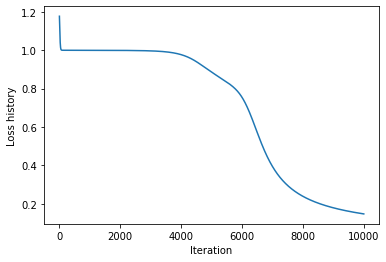

In [8]:
plt.plot(loss_history)
plt.ylabel('Loss history')
plt.xlabel('Iteration')
plt.show()

In [9]:
# Проверим, что отвечает нейросеть на первых 10 пар чисел в данных

for x_i, y_i in zip(inputs[:10], expected_output[:10]):
    print(x_i, '~~>', '%.2f' % forward(x_i), '[%d]' % y_i)

[0 0] ~~> 0.07 [0]
[0 1] ~~> 0.93 [1]
[1 0] ~~> 0.93 [1]
[1 1] ~~> 0.08 [0]
